In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats


In [156]:
sns.set(rc = {'figure.figsize':(30, 16)})
data = pd.read_csv('export.csv')

In [157]:
data = data[data['X'] >= 0]
data = data[data['Y'] >= 0]
data = data[data['X'] <= 4225]
data = data[data['Y'] <= 1560]

data = data[['X', 'Y', 'Eye movement type', 'Recording timestamp']]

data['PREV_X'] = data['X'].shift(1)
data['PREV_Y'] = data['X'].shift(1)
data['TIME'] = data['Recording timestamp']
data['PREV_TIME'] = data['TIME'].shift(1)

Y = data['Eye movement type']

In [158]:
dy = np.diff(data['TIME'])
dxX = np.diff(data['X'])
dxY = np.diff(data['Y'])

data.drop(0, inplace=True)
data['SPEED_DIFF_X'] = dxX / dy
data['SPEED_DIFF_Y'] = dxY / dy

test = data[['SPEED_DIFF_X', 'SPEED_DIFF_Y', 'Eye movement type', 'TIME']][data['Eye movement type'] != 'Unclassified']
test = test.head(10000)

<AxesSubplot:xlabel='TIME', ylabel='SPEED_DIFF_X'>

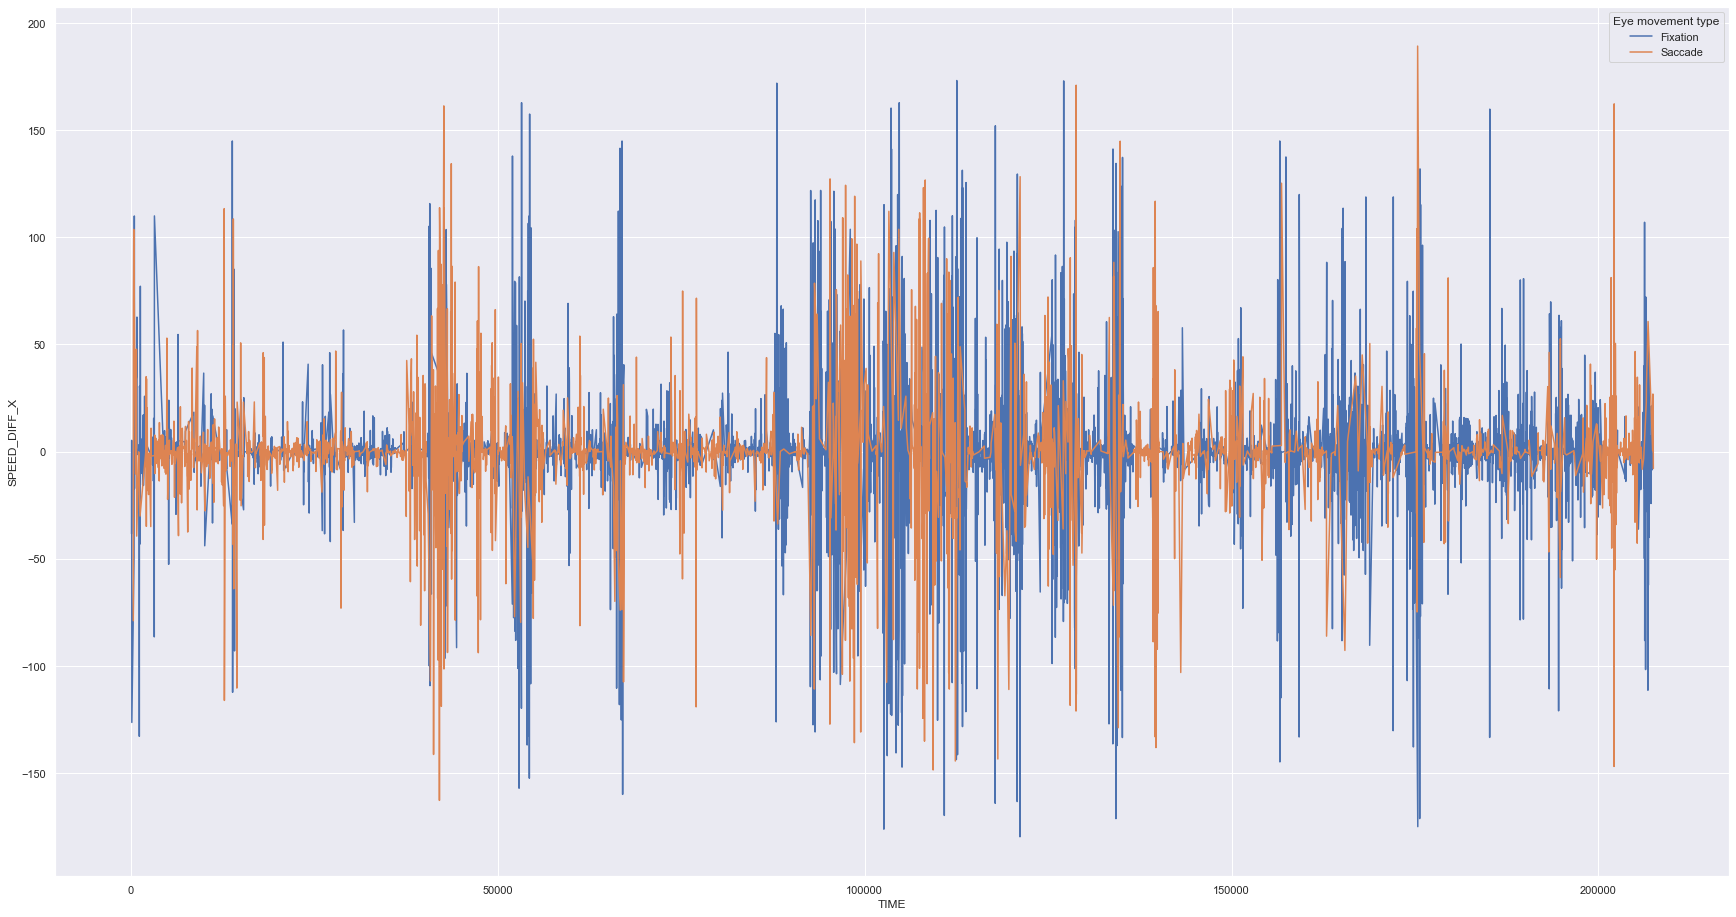

In [159]:

sns.lineplot(x=test['TIME'], y=test['SPEED_DIFF_X'], hue=test['Eye movement type'])

<AxesSubplot:xlabel='TIME', ylabel='SPEED_DIFF_Y'>

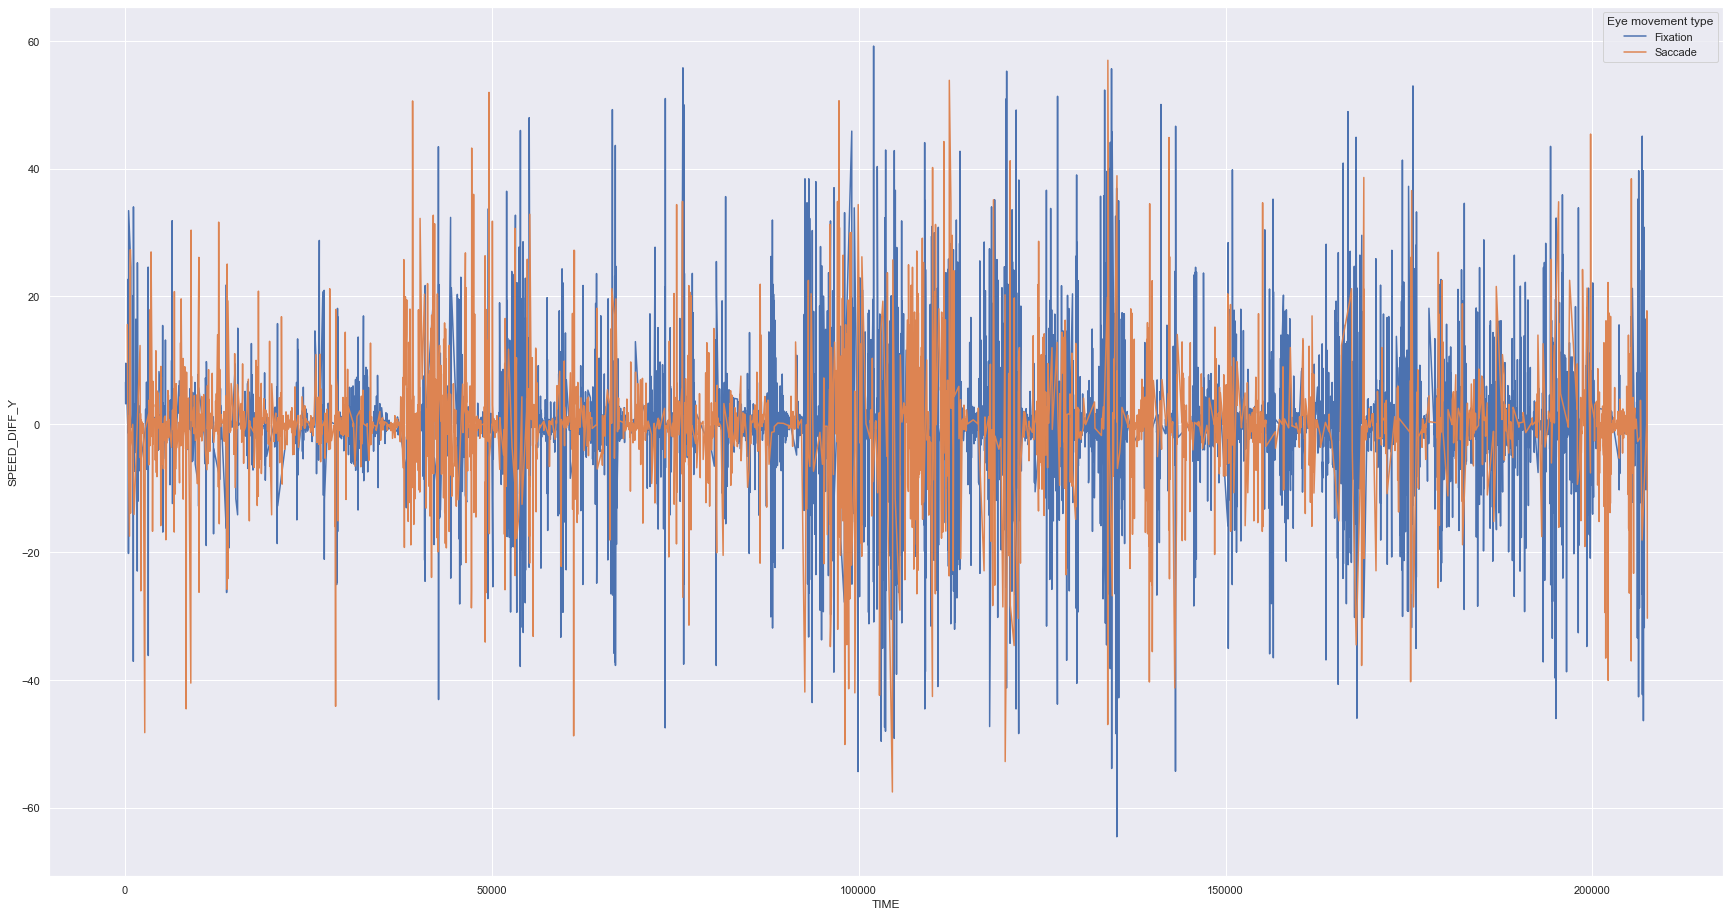

In [160]:
sns.lineplot(x=test['TIME'], y=test['SPEED_DIFF_Y'], hue=test['Eye movement type'])